In [21]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
#a=np.array([[[1],[2]] ,[[3],[4]] ,[[5],[6]]])
#a = np.array([[1,2,3],[4,5,6]])
#print(a)
#b = np.array([1,2,3])
#print(len(a.shape))
# c = list(b.shape)

# if len(c) == 1:
#     print(len(c))
#     c.append(1)


In [3]:
data = pd.read_csv(r'C:\Users\lou\Desktop\枫枫的小仙女\菜菜sklearn课件\01 决策树课件数据源码\data.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 清洗数据

In [5]:
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)
data.Age = data.Age.fillna(data.Age.mean())
data = data.dropna()

In [6]:
#将分类变量转换为
data.Sex = (data.Sex == 'male').astype('int')
labels = data.Embarked.unique().tolist()
data.Embarked = data.Embarked.apply(lambda x: labels.index(x))

In [10]:
X = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3)

for i in [xtrain,xtest,ytrain,ytest]:
    i.index = range(i.shape[0])
    
xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,536,2,0,7.0,0,2,26.2500,0
1,279,3,1,7.0,4,1,29.1250,2
2,882,3,1,33.0,0,0,7.8958,0
3,515,3,1,24.0,0,0,7.4958,0
4,870,3,1,4.0,1,1,11.1333,0


In [16]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(xtrain,ytrain)

score1 = clf.score(xtest,ytest)
score2 = cross_val_score(clf,X,y,cv=10).mean()
print(score1,score2)

0.7265917602996255 0.7469611848825333


0.8166624106230849


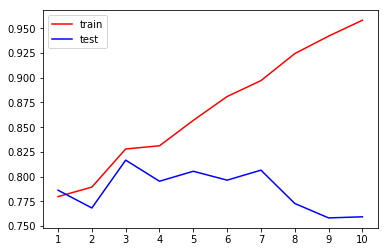

In [22]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                            ,max_depth=i+1
                            ,criterion="entropy")
    clf = clf.fit(xtrain, ytrain)
    score_tr = clf.score(xtrain,ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()
#这里为什么使用“entropy”？因为我们注意到，在最大深度=3的时候，模型拟合不足，在训练集和测试集上的表现接
